# Curve Similarity Analysis - Deaths
- **Created by: Andrés Segura Tinoco**
- **Created on: May 12, 2020**
- **Data: Deaths by Covid 19**

**Packages Installation**
``` console
conda config --set pip_interop_enabled True
pip install similaritymeasures
```

**Methods:**
1. Mean Absolute Error
2. Partial Curve Mapping
3. Discrete Frechet distance
4. Area between two Curves
5. Curve Length Similarity
6. Dynamic Time Warping distance

## 1. Read C19 deaths by country

In [1]:
# # Import libraries
import pandas as pd
import numpy as np
import math
import similaritymeasures
from collections import Counter

In [2]:
# Load visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Reading data from CSV file
dataURL = "../data/country_deaths_by_days.csv"
raw_data = pd.read_csv(dataURL)

In [4]:
# Show first 10 rows of header dataframe
raw_data.head(10)

,country,region,1,2,3,4,5,6,7,8,...,125,126,127,128,129,130,131,132,133,134
0,USA,Americas,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UK,Europe,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Italy,Europe,0,0,0,0,0,0,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,France,Europe,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Spain,Europe,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Brazil,Americas,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Belgium,Europe,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Mexico,Americas,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Germany,Europe,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Iran,Asia,2,2,4,6,8,12,16,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Calculate the Similarity between Countries

In [5]:
# Control variables
cnt = Counter()
top_country = 10
n_days = 85
n_methods = 6

# Analysis variables
exp_country = 'Colombia'
exp_data = np.zeros((n_days, 2))
countries_data = dict()
countries_region = dict()

In [6]:
# Split data between expected and reality datasets
for ix, row in raw_data.iterrows():
    country_name = row["country"]
    countries_region[country_name] = row["region"]
    y = []
    
    for i in range(1, n_days + 1):
        if pd.notna(row[str(i)]):
            y.append(int(row[str(i)]))
        else:
            break
    
    if country_name == exp_country:    
        exp_data[:, 0] = np.arange(n_days)
        exp_data[:, 1] = y
    else:
        if len(y) == n_days:
            temp_data = np.zeros((n_days, 2))
            temp_data[:, 0] = np.arange(n_days)
            temp_data[:, 1] = y
            countries_data[country_name] = temp_data

### 2.1. Mean Absolute Error

In [7]:
mae_result = dict()
for country, num_data in countries_data.items():
    mae = 0
    for ix in range(0, n_days):
        mae += abs(exp_data[ix, 1] - num_data[ix, 1])
    mae_result[country] = mae / n_days

In [8]:
# Get and save top N
output = sorted(mae_result, key=mae_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, mae_result[country]))

Philippines: 45.976470588235294
Hungary: 51.98823529411764
Algeria: 53.8
Pakistan: 53.811764705882354
Denmark: 54.71764705882353
Ukraine: 58.705882352941174
Dominican Republic: 62.90588235294118
Austria: 68.89411764705882
Chile: 70.7764705882353
Bangladesh: 88.63529411764706


### 2.2. Partial Curve Mapping

In [9]:
# Quantify the difference between the two curves using PCM
pcm_result = dict()
for country, num_data in countries_data.items():
    pcm = similaritymeasures.pcm(exp_data, num_data)
    pcm_result[country] = pcm

In [10]:
# Get and save top N
output = sorted(pcm_result, key=pcm_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, pcm_result[country]))

Pakistan: 2.314374293510048
Chile: 2.317609429012769
Philippines: 3.560992304498863
Ukraine: 4.0791994016184185
Bangladesh: 4.190485392145406
Denmark: 5.394028532920833
South Africa: 5.715718306769283
Poland: 5.775875247714459
Hungary: 6.008091977236395
Austria: 6.309153923842337


### 2.3. Discrete Frechet distance

In [11]:
### Quantify the difference between the two curves using Discrete Frechet distance
df_result = dict()
for country, num_data in countries_data.items():
    df = similaritymeasures.frechet_dist(exp_data, num_data)
    df_result[country] = df

In [12]:
# Get and save top N
output = sorted(df_result, key=df_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, df_result[country]))

Chile: 47.0
Philippines: 149.0
Pakistan: 164.0
Poland: 175.0
Bangladesh: 203.0
Ukraine: 209.0
Austria: 221.0
Algeria: 292.0
Denmark: 292.0
Romania: 294.0


### 2.4. Area between two Curves

In [13]:
# Quantify the difference between the two curves using Area between two Curves
area_result = dict()
for country, num_data in countries_data.items():
    area = similaritymeasures.area_between_two_curves(exp_data, num_data)
    area_result[country] = area

In [14]:
# Get and save top N
output = sorted(area_result, key=area_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, area_result[country]))

Philippines: 3833.0
Hungary: 4242.5
Algeria: 4423.5
Pakistan: 4491.0
Denmark: 4499.5
Ukraine: 4885.0
Dominican Republic: 5146.5
Austria: 5745.0
Chile: 5991.5
Bangladesh: 7432.5


### 2.5. Curve Length Similarity

In [15]:
# Quantify the difference between the two curves using Curve Length based similarity measure
cl_result = dict()
for country, num_data in countries_data.items():
    cl = similaritymeasures.curve_length_measure(exp_data, num_data)
    cl_result[country] = cl

In [16]:
# Get and save top N
output = sorted(cl_result, key=cl_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, cl_result[country]))

Chile: 1.6370745475350865
Pakistan: 1.8989603902249812
Austria: 2.1294478288464327
Philippines: 2.196267179368424
Ukraine: 2.6417108068547828
Denmark: 2.876759555490601
Bangladesh: 2.9219921375451565
Algeria: 3.0907913694314053
Poland: 3.3791299188483106
Hungary: 3.564686445555847


### 2.6. Dynamic Time Warping distance

In [17]:
# Quantify the difference between the two curves using Dynamic Time Warping distance
dtw_result = dict()
for country, num_data in countries_data.items():
    dtw, d = similaritymeasures.dtw(exp_data, num_data)
    dtw_result[country] = dtw

In [18]:
# Get and save top N
output = sorted(dtw_result, key=dtw_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, dtw_result[country]))

Chile: 752.0345440267226
Philippines: 1060.4800141720839
Pakistan: 1158.5923235033185
Ukraine: 1386.0055337035724
Bangladesh: 1607.0791690838091
Austria: 1634.9286210832788
Algeria: 2355.543479330209
Denmark: 2359.1655770842963
Poland: 2424.660614123696
South Africa: 3065.762482549331


## 3. Plot Similarity Results

In [19]:
cnt.most_common()

[('Philippines', 6),
 ('Pakistan', 6),
 ('Denmark', 6),
 ('Ukraine', 6),
 ('Austria', 6),
 ('Chile', 6),
 ('Bangladesh', 6),
 ('Algeria', 5),
 ('Hungary', 4),
 ('Poland', 4),
 ('Dominican Republic', 2),
 ('South Africa', 2),
 ('Romania', 1)]

In [20]:
# Palette of colores
palette = {"Africa": "#FF7F0E", "Americas": "#D62728", "Asia": "#2CA02C", "Europe": "#1F77B4", "Oceania": "#9467BD"}
bars = []
values= []

for row in cnt.most_common():
    bars.append(row[0])
    values.append(row[1])

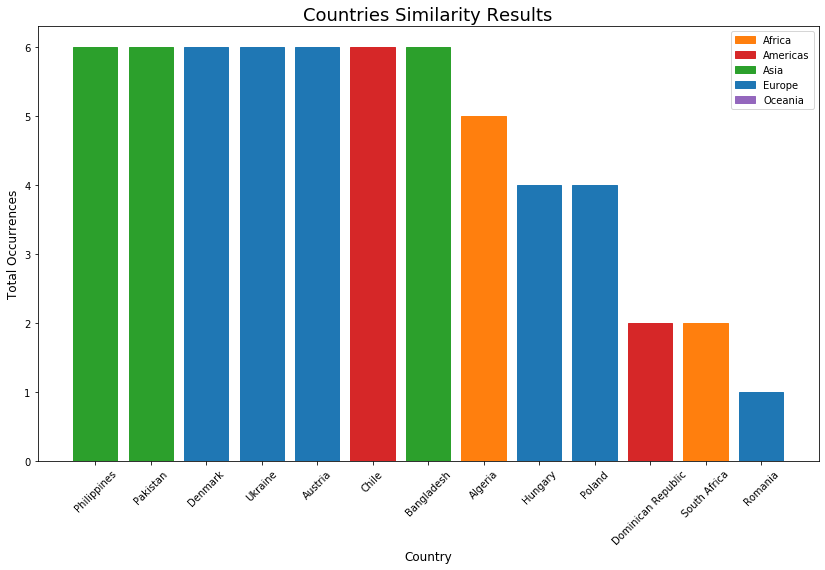

In [21]:
# Plot similarity results
plt.figure(figsize = (14, 8))

barlist = plt.bar(bars, values)
for i, v in enumerate(bars):
    barlist[i].set_color(palette[countries_region[v]])

# Add custom legend
legend_list = []
for k, v in palette.items():
    legend_list.append(mpatches.Patch(color = v, label = k))

# Plot setup
plt.xticks(rotation=45)
plt.title("Countries Similarity Results", fontsize = 18)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Total Occurrences", fontsize = 12)
plt.legend(handles = legend_list, loc = "best")
plt.show()

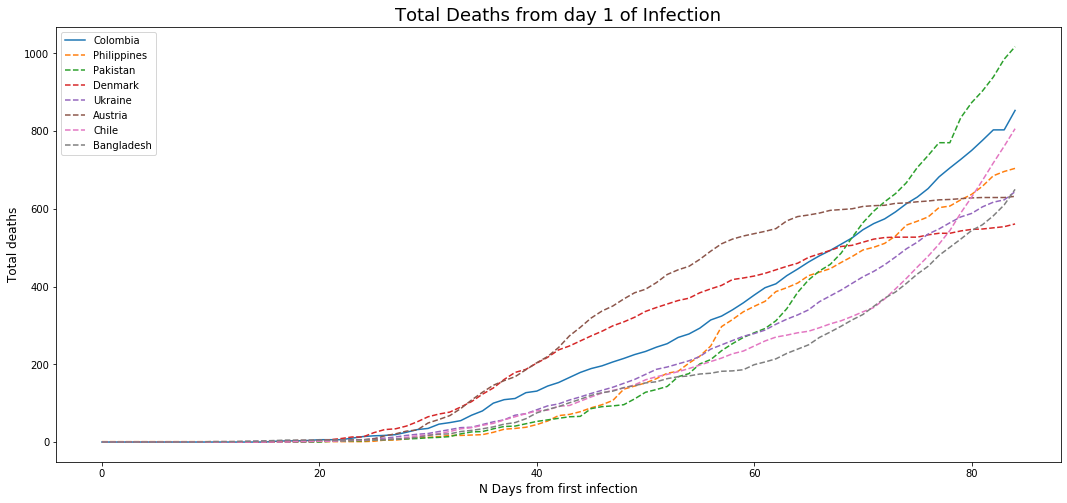

In [22]:
# Plot trends more similar to Colombia
country_list = ['Colombia']

plt.figure(figsize = (18, 8))
plt.plot(exp_data[:, 0], exp_data[:, 1])

for country in cnt:
    if cnt[country] == n_methods:
        country_list.append(country)
        num_data = countries_data[country]
        plt.plot(num_data[:, 0], num_data[:, 1], linestyle='--')

# Plot setup
plt.title("Total Deaths from day 1 of Infection", fontsize = 18)
plt.xlabel("N Days from first infection", fontsize = 12)
plt.ylabel("Total deaths", fontsize = 12)
plt.legend(country_list, loc = "best")
plt.show()

## References

Jekel, C. F., Venter, G., Venter, M. P., Stander, N., & Haftka, R. T. (2018). Similarity measures for identifying material parameters from hysteresis loops using inverse analysis. International Journal of Material Forming. https://doi.org/10.1007/s12289-018-1421-8

<hr>
<p><a href="https://github.com/ansegura7/WebScraping_Covid19">« Home</a></p>